# Theory 

Let’s see how we can go about implementing AdaBoost in Python. To start, we import the following libraries.

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In this example, we’ll use AdaBoost to classify tumors as being malignant or benign. We use the scikit-learn API to import the dataset into our program.

In [2]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

Whenever we are working with categorical feature, we must encode it as numbers. For this problem, we’ll set malignant to 1 and benign to 0.

In [3]:
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))

We split our data into training and test sets to evaluate our model’s performance.

In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, binary_encoded_y, random_state=1)

Next, we construct and fit our model to the training set. max_depth=1 is used to tell our model that we’d like our forest to be composed of trees with a single decision node and two leaves. n_estimators is used to specify the total number of trees in the forest.

In [6]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

We use our model to predict whether a tumor is malignant or benign given what it has learnt.

In [7]:
predictions = classifier.predict(test_X)

Finally, we evaluate the model using a confusion matrix. The model finished with 2 false positives and 3 false negatives.

In [8]:
confusion_matrix(test_y, predictions)

array([[86,  2],
       [ 3, 52]])

# Second Example 

In [3]:
import pandas as pd 
df=pd.read_csv("datasets_33180_43520_heart.csv", sep=",")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


The dataset used in this example is the Cleveland Heart Disease dataset taken from the UCI repository. 
[*Heart Disease Data Set*](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data exploration
Let's take a deeper look at some of the features. We are going to make some visualizations to make things more obvious to us and get some insights about our data. Kaggle does a great and simply job capturing the most important things to make awesome visualizations

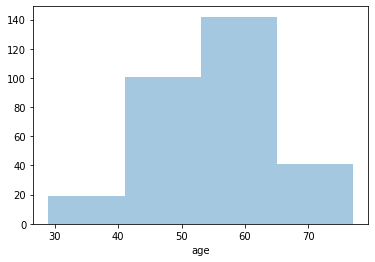

In [11]:
import seaborn as sns
sns.distplot(df["age"], bins=4, kde=False)

- Approximately, 80% of the people are in the range of 41-65.

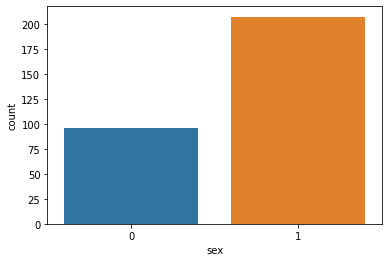

In [13]:
sns.countplot(df["sex"])

- More than 2/3 of the population in the dataset are male

In [14]:
total = len(df["sex"])
males = df["sex"].sum()
females = len(df["sex"]) - males
print("Porcentage of males:", round(males/total*100, 3))
print("procentage of females:", round(females/total*100, 3))

Porcentage of males: 68.317
procentage of females: 31.683


Text(0, 0.5, 'amount')

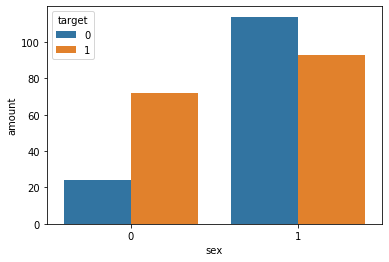

In [15]:
sex_graph = sns.countplot(df["sex"], hue=df["target"])
sex_graph.set_ylabel("amount")

- There are not a huge disparity between the number of healthy and unhealthy men. The difference is more notoriuos for females.

Text(0, 0.5, 'amount')

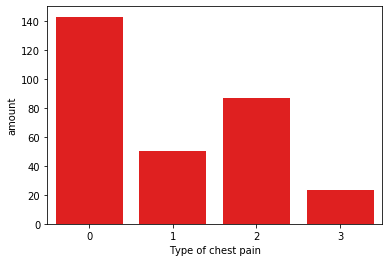

In [16]:
cp_graph = sns.countplot(df["cp"], color="red")
cp_graph.set_xlabel("Type of chest pain")
cp_graph.set_ylabel("amount")

- Almost, half of the people are asymptomatic.

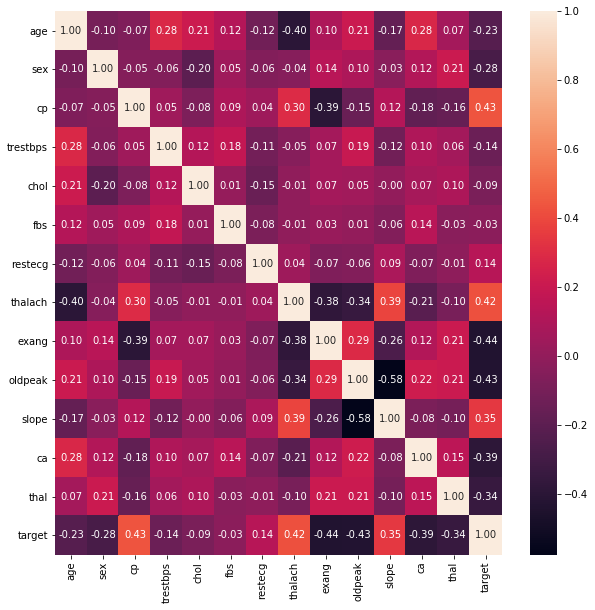

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

- A summary of the correlation of every pair of features. 
The ones that are more correlated with the target are cp, thalach and slop in that order. 
This is a good way to later select the most promising features for our final model, 
although there are other more sophisticated and automated ways to select the best features.

# Preprocessing data



In [19]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Due to the description of the features, some of them are categorical not numbers, so let's fix that.

In [20]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['thal'] = df['thal'].astype('object')

In [21]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [22]:
df = pd.get_dummies(df)
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_0,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [23]:
print("Heart data shape is:", df.shape[0], "x", df.shape[1])

Heart data shape is: 303 x 27


# Machine Learning

In [24]:
# Getting features and target
X = df.drop(["target"], axis=1)
y = df["target"]

# AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
AB_model = AdaBoostClassifier(n_estimators=100)
AB_predictions = cross_val_predict(AB_model, X, y, cv=5)
print(confusion_matrix(y, AB_predictions))
AB_scores = cross_val_score(AB_model, X, y, scoring="recall", cv=5)
print("recall:", AB_scores.mean())

[[100  38]
 [ 26 139]]
recall: 0.8424242424242424
